In [1]:
# Make sure helpers functionality can be imported
import os
import sys

project_path, _ = os.path.split(os.getcwd())
if project_path not in sys.path:
    sys.path.insert(0, project_path)

In [2]:
# Dependencies
# pip install numpy
# pip install pandas
# pip install scipy

# Ignore warnings
import warnings; warnings.simplefilter("ignore")

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load an experimental data

In [3]:
# Load an example dataset
from sklearn.datasets import load_diabetes

dataset = load_diabetes()
X = dataset.data
y = dataset.target
feature_names = dataset.feature_names

print(dataset.get('DESCR'))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

## Plot the correlation matrix

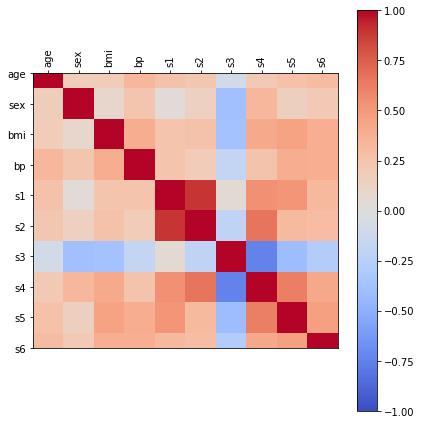

In [4]:
from helpers.correlation.visualization import plot_correlation_matrix

# Create the copy of the feature matrix
features = X.copy()
df_features = pd.DataFrame({feature_names[i]: features[:, i] for i in range(features.shape[1])})

# Plot the correlation matrix
plot_correlation_matrix(df_features, fig_size=(6, 6), fig_show=False, save_as=None)

## Plot the correlation graph

### 1. Plot single graph

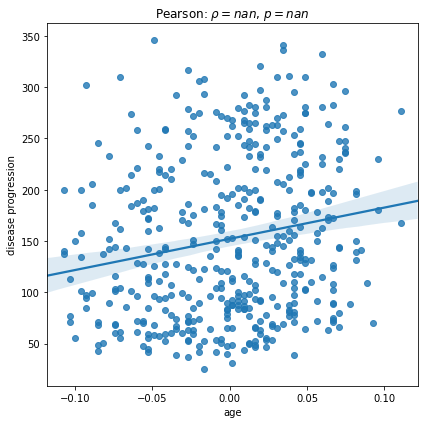

In [5]:
from helpers.correlation.visualization import plot_correlation

# Get example feature
X_temp = X[:, 0]
X_name = feature_names[0]

# Plot the correlation
plot_correlation(X_temp,
                 y,
                 corr_type="pearson",
                 fig_size=(6, 6),
                 fig_show=True,
                 save_as=None,
                 x_label=X_name,
                 y_label="disease progression")

### 2. Plot multiple graphs

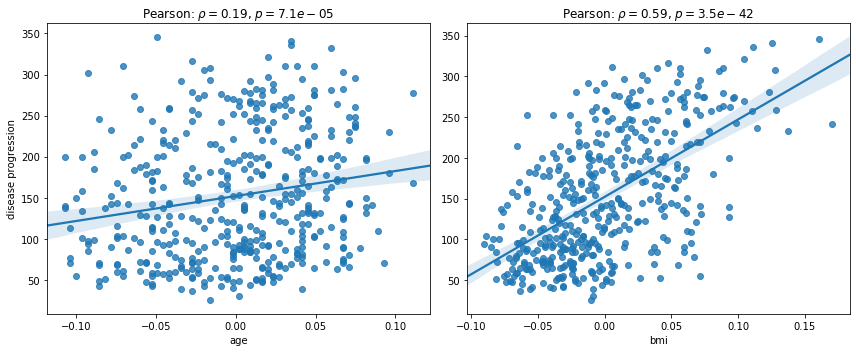

In [8]:
from helpers.correlation.visualization import plot_correlation

# Prepare the figure
fig = plt.figure(figsize=(12, 5))

# Plot the correlation graph for example features (age, bmi, dp)
for vol, i in enumerate((0, 2), 1):

    # Get example feature
    X_temp = X[:, i]
    X_name = feature_names[i]

    # Add the subplot (create axes)
    ax = fig.add_subplot(1, 2, vol)
    
    # Plot the correlation
    plot_correlation(X_temp,
                     y,
                     corr_type="pearson",
                     ax=ax,
                     fig_show=False,
                     save_as=None,
                     x_label=X_name,
                     y_label="disease progression" if i == 0 else "")

plt.savefig("correlation_plots.png", bbox_inches="tight")
plt.show()